In [439]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
print('24MAI0111_ANMOL_CHAUBEY')
#reading the dataset
df=pd.read_csv('winequality-red.csv', sep=';', quotechar='"')

24MAI0111_ANMOL_CHAUBEY


In [441]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [442]:
#taking the rest of the features except the quality
x=df.drop('quality', axis=1)
#taking quality as target 
y=df['quality']

In [443]:
#spliting the data into training and testing set where 30%data is for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [444]:
#hyperparameter tuning for standardising the features 
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [445]:
df.shape

(1599, 12)

In [446]:
#creates knn classifier with 40 neighbors
knn=KNeighborsClassifier(n_neighbors=40)

In [447]:
#trains the knn model 
knn.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=40)

In [448]:
#predicts the target variable
y_pred = knn.predict(x_test_scale)

In [449]:
#calculates the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
#computes the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#generates a report showing the precision, recall, f1 score and support
class_report =classification_report(y_test, y_pred)

c:\Users\Anmol Chaubey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anmol Chaubey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anmol Chaubey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [450]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report :')
print(class_report)
print('24MAI0111_ANMOL_CHAUBEY')

Accuracy: 0.53
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  0   0 131  62   2   0]
 [  0   0  76 107  17   0]
 [  0   0   5  39  17   0]
 [  0   0   0   4   2   0]]
Classification Report :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.59      0.67      0.63       195
           6       0.49      0.54      0.51       200
           7       0.45      0.28      0.34        61
           8       0.00      0.00      0.00         6

    accuracy                           0.53       480
   macro avg       0.25      0.25      0.25       480
weighted avg       0.50      0.53      0.51       480

24MAI0111_ANMOL_CHAUBEY


In [451]:
#applying the hyperparameter tunning for improving the Accuracy 
param_grid = {'n_neighbors': list(range(1,21))}

In [452]:
#performs grid search with 5-fold-cross-validation 
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5, scoring='accuracy')

In [453]:
#fits the grid search to training data
grid_search.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [459]:
print('Best cross-validation score:', grid_search.best_score_)

Best cross-validation score: 0.6094811018577835


In [455]:
#retrives the best model for grid search
best_knn = grid_search.best_estimator_
#predicts the target values using the best model
y_pred_best = best_knn.predict(x_test_scale)

In [456]:
#calculates accuracy, confusion matrix, and report
accu = accuracy_score(y_test , y_pred_best)
cao_matrix = confusion_matrix(y_test, y_pred_best)
class_repo = classification_report(y_test, y_pred_best)

In [457]:
print(f'Accuracy after cross validation : {accu:.2f}')
print('Confusion Matrix:')
print(cao_matrix)
print('Classification Report:')
print(class_repo)

Accuracy after cross validation : 0.62
Confusion Matrix:
[[  0   0   0   1   0   0]
 [  2   2   4   9   0   0]
 [  2   6 130  48   9   0]
 [  0   6  44 127  22   1]
 [  0   0   1  18  39   3]
 [  0   0   0   1   4   1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.12      0.13        17
           5       0.73      0.67      0.70       195
           6       0.62      0.64      0.63       200
           7       0.53      0.64      0.58        61
           8       0.20      0.17      0.18         6

    accuracy                           0.62       480
   macro avg       0.37      0.37      0.37       480
weighted avg       0.63      0.62      0.62       480



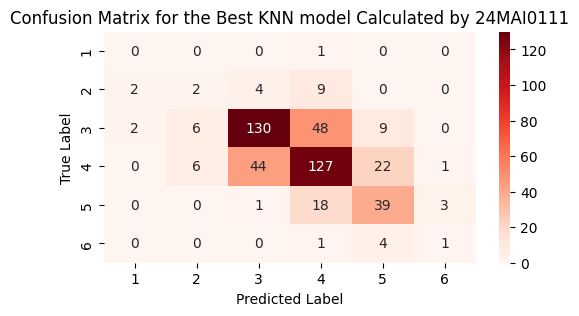

In [466]:
plt.figure(figsize=(6,3))
#creates the heatmap
sns.heatmap(cao_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=range(1,7), yticklabels=range(1,7))
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title('Confusion Matrix for the Best KNN model Calculated by 24MAI0111')
plt.show()